# Lab 12: Exploring Unfairness and Biased Data ⚖️

## Learning Objectives
* Understanding and Applying Linear Regression 
* Gaining Awareness of Bias in Data and Unfairness in ML Algorithms
* Data Exploration
* Practice ML Workflow: Training, Testing, and Evaluation

## Outline

1. [Unfairness](#1.-Unfairness)
2. [Exploring Loan Approval Data](#2.-Exploring-Loan-Approval-Data)
3. [Building a Model](#3.-Building-a-Model)
4. [Becoming Data and Fairness Aware](#4.-Becoming-Data-and-Fairness-Aware)

## 1. Unfairness and Bias

### An Example
It is natural to assume that a model built from "real-world" data will inherently represent the world-at-large. We often take the data that we have for granted, especially when we are first getting started with Data Science. However, if we do not pay attention to what our data look like, how they were collected, and what features they contain, we may unknowingly create models that propagate cultural biases and unfairnesses.

> _So, what does it mean for a model to be unfair?_

Let's look at an example first. In 2014, Amazon began building programs that could automate the hiring process for engineers. They wanted a machine to be able to pick out the top resumes from the thousands they receive every year. This was reported in this [Reuters article](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G) and has since been discussed by other sources.

<img src="utility/images/undraw_hire_te5y.png" alt="hire" style="width: 600px;"/>

They trained their model on all of the resumes that they had, hoping that the model would be able to identify trends in keyword frequency within those applications. However, as they began to deploy their model, it became increasingly apparent that the model was discriminating against women. When engineers investigated why this was the case, they found that the data they trained the model with, the resumes, had mostly come from men. The model had learned to prefer resumes that didn't contain the word "women's" because that word wasn't frequently seen during its training. Although gender was not explicitly a feature of the dataset, it was still present in the dataset, encoded within the experiences that applicants reported.

### Sources of Bias in Data

Let's watch a short introductory [video](https://youtu.be/59bMh59JQDo) to learn about different types of bias. 


**Write-up!** Which type of bias(es) do think are reflected in the Amazon example? Discuss with your neighbors. 

Amazon's case serves as a reminder that we must be careful of our data and models, even more so today as data becomes cheaper to collect.

### Our Scenario: Loan Approval

Imagine that you are a data scientist at a bank and that one of your company's primary business areas is in lending money. The current loan approval process, that has been in place since the founding of the bank, has always relied on manual review of applications -- a process that is tedious and doesn't scale well in the modern age. The company wants to expand their business, but this archeic system is holding them back.

Think about how to approach this problem, you immediately think of using the bank's past loan approval records to build a model that can learn how a human application reviewer decides which applications to approve and which to reject.

<img src="utility/images/undraw_accept_request_vdsd.png" alt="approval" style="width: 600px;"/>

### Defining Fairness
It turns out that defining unfairness is a challenging task and in fact by adhering to one definition of fairness you might violate another. But that doesn't mean we shouldn't try. Below are five definitions applied to our load approval scenario (taken from [here](https://towardsdatascience.com/bias-and-algorithmic-fairness-10f0805edc2b)).

> Which one is *best*? Take a couple of minutes to read through and understand the different definitions. Then, discuss your choice(es) in your group or with your partner!

#### <a name="GUS"></a>  Group Unaware Selection (also *Fairness though Blindness*)
We simply disregard the gender information in the application process. Because there is a limited number of possible approvals a lender can grant they go to the most qualified individual based on objective, gender neutral criteria. But removing gender and gender-proxy information does not address historic biases and is generally not a very efficient process to mitigate bias as we will see in the worked example on loan application data below.

#### Adjusted Group Thresholds 
Because historic biases make women appear less loan-worthy than men, e.g. work history and childcare responsibilities, we use different approval thresholds by group.

#### Demographic Parity
The approval rates should reflect the percentage of applications by group. But this would not take the risk of a default on a mortgage into account.

#### Equal Opportunity 
The same percentage of men and women who are loan-worthy are given mortgages. This seems to meet the business objective of a mortgage lender and seems to be fair. _"Individuals who qualify for a desirable outcome should have an equal chance of being correctly classified for this outcome."_ (Moritz Hardt)

#### Precision Parity
Not granting loans can have a very negative impact on an individual. In equal opportunity both groups have true positive parity. But if the model is wrong twice as often about women not paying back their loans (false negative) than the model would reject twice as many loan-worthy women than men. As such the model should be tuned so that the percentage of times the model is wrong in the total of approvals and denials is the same for both groups.

Is there a universal definition for “fairness”?
What should we do when business requirements conflict with ethical requirements?
If we can’t reconcile them, do we just stop?


**Discussion and Write-up!** Consider the following questions: 
- Which definition would you use?
- Does this choice violate other defintions/aspects of fairness?
- Can there a universal definition for “fairness”?
- What should we do when business requirements conflict with ethical requirements?
- If we can’t reconcile these requirements, should we just stop?

Discuss your choice(es) in your group or with your partner! This should take at least 10min. Record the discussion outcome and main thoughts (pros and cons).

## 2. Exploring Loan Approval Data

Now, it's time to look at our data. As you work through this section, try to look for hints of bias in the data set.


### Acquiring the Data
Before we begin, let's make sure that we have the data. The cell below checks if you have the `loan-payments.csv` file in the `utility/data` directory.


In [23]:
from os.path import exists


data_dir = 'utility/data'

assert exists(f'{data_dir}/loan-payments.csv'), 'Loan data file is missing.'

Next, let's load our data. In the cell below, we read our [CSV][1] file into a [Pandas][2] [`DataFrame`][3] called `data`.



[1]: https://en.wikipedia.org/wiki/Comma-separated_values
[2]: https://pandas.pydata.org/
[3]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [24]:
import pandas as pd

data = pd.read_csv(f'{data_dir}/loan-payments.csv')

Let's take a look at what we have.

In [25]:
data.head()

,ID,Status,Principal,Terms,Effective Date,Due Date,Date Closed,Risk Score,Age,Education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0.0,50,Bachelors,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0.0,33,Bachelors,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0.0,27,College,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0.0,28,College,female


**Write-up!** How many examples are in our data set? How many features does it have?

**Write-up!** With your neighbor, come up with a description of what you think each feature is and what type of feature each one is. Which one should be our target variable? Which ones do you think will be useful for our model?

### Making Some Adjustments

Now let's drop the columns in `data` that contain features that we are not interested in. Since `ID`s are not informative for predicting new loans, we can ignore them. Additionally, from our communications with the client lender, we know that `Effective Date`, `Due Date`, and `Date Closed` have all been factored into the `Risk Score`.

**Try this!** In the following cell, create a list containing the names of the features that you would like to **exclude** from the data set and store it in `not_interested`.

In [26]:
# your code here
not_interested = ["Effective Date", "Due Date", "Date Closed", "ID"]

data = data.drop(not_interested, axis=1)

Let's see our new data set.

In [27]:
data.head()

,Status,Principal,Terms,Risk Score,Age,Education,Gender
0,PAIDOFF,1000,30,0.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bachelors,female
2,PAIDOFF,1000,30,0.0,33,Bachelors,female
3,PAIDOFF,1000,15,0.0,27,College,male
4,PAIDOFF,1000,30,0.0,28,College,female


### Visualizing the Data Set

Now that we have narrowed down the features we want to use, let's visualize them.

**Try this!** For each feature, make a new cell below and create a plot that we can use to understand the values of that feature. These plots should be appropriate for the type of each feature (e.g. use a bar plot for categorical features). Ensure that you have all the components off a nice plot, making sure to include things like axes labels, a legend, and a title. Also include a `raw` cell below each, describing what you see. _**Hint!** you can copy and paste groups of cells by shift-clicking them on the left._

<BarContainer object of 2 artists>

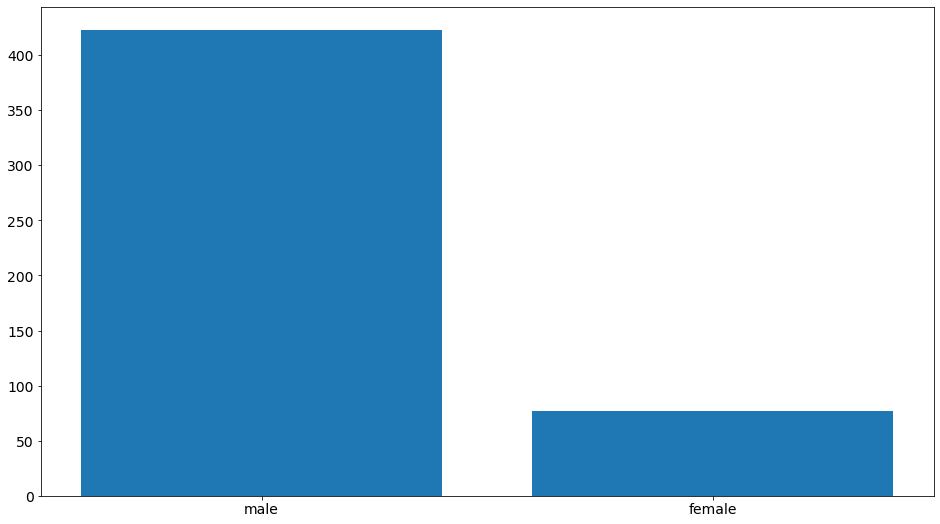

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from utility.util import configure_plots

# this cell is free!
configure_plots()

# your code here
plt.bar(["male", "female"], pd.value_counts(data["Gender"]))

#### Gender and Education

Let's take a deeper look at the `Gender` and `Education` features.

**Try this!** In the following cell, use `education_by_gender` to create a barplot that shows bars for each gender side-by-side for each education level.

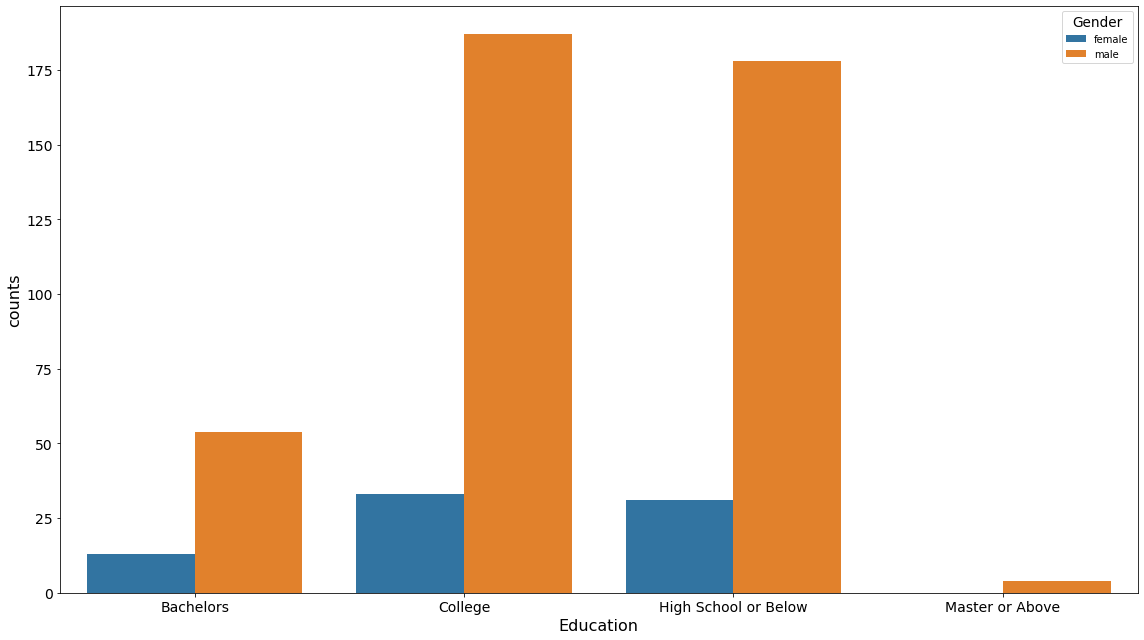

In [29]:
# group by gender and education and count the number of examples
# for each pair of feature values
education_by_gender = data[['Gender', 'Education', 'Status']] \
    .groupby(['Gender', 'Education'], as_index=False) \
    .aggregate('count')

# after aggregation, all columns other than the ones used to group will have
# the same values. here we included `Status` as a placeholder column which
# now holds counts, so should be renamed.
import seaborn as sns
education_by_gender = education_by_gender.rename({'Status': 'counts'}, axis=1)


# your code here
sns.barplot(x="Education", y="counts", hue="Gender", data=education_by_gender)
plt.tight_layout()

**Try this!** In the following cell, use `loan_status_by_gender` to create a barplot that shows bars for each gender side-by-side for each education level.

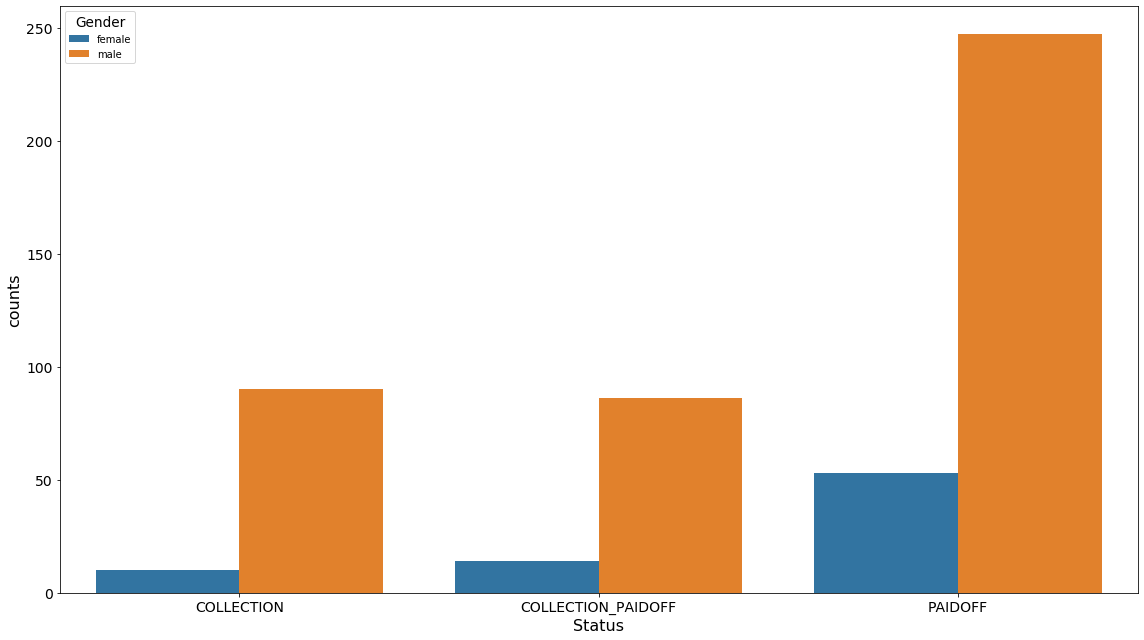

In [30]:
# group by gender and education and count the number of examples
# for each pair of feature values
loan_status_by_gender = data[['Gender', 'Education', 'Status']] \
    .groupby(['Gender', 'Status'], as_index=False) \
    .aggregate('count')

# after aggregation, all columns other than the ones used to group will have
# the same values. here we included `Education` as a placeholder column which
# now holds counts, so should be renamed.
loan_status_by_gender = loan_status_by_gender.rename({'Education': 'counts'}, axis=1)


# your code here
sns.barplot(x="Status", y="counts", hue="Gender", data=loan_status_by_gender)
plt.tight_layout()

**Write-up!** Is our data set biased? What do you think may have caused this? Think about the different types of bias.

## 3. Building a Model

Now that we have a sense for the bias of our dataset, what can we try to mitigate the problem? Let's start building some models.

<img src="utility/images/undraw_predictive_analytics_kf9n.png" alt="analytics" style="width: 600px;"/>

### Encoding Categorical and Ordinal Features

Before we continue, we will need to encode our categorical and [ordinal](https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-numerical-variables/) features with enumerations instead of the string values that they currently have. As a reminder, this is what our dataset looks like right now.

In [31]:
data.head()

,Status,Principal,Terms,Risk Score,Age,Education,Gender
0,PAIDOFF,1000,30,0.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bachelors,female
2,PAIDOFF,1000,30,0.0,33,Bachelors,female
3,PAIDOFF,1000,15,0.0,27,College,male
4,PAIDOFF,1000,30,0.0,28,College,female


**Try this!** In the following cell, create a list containing the feature names of the categorical variables and store it in `categorical`. Repeat this for the ordinal variables, storing it in `ordinal`.

In [32]:
# your code here
categorical = ["Gender", "Status"]
ordinal = ["Education"]

#### Encoding Categorical Variables

An easy way to encode categorical variables is to use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) from `sklearn`. In the cell below, we create a list called `categorical` containing the names of the columns corresponding to the categorical features in our dataset. We then create and instance of a `LabelEncoder` and use it to transform the categorical features. We use `fit_transform` to remember the encodings it used so that we can apply the same transformation to other data sets (for example a test set if we had already split our data set).

In [33]:
from sklearn.preprocessing import LabelEncoder

# make a copy of our data
label_encoded = data[categorical].copy()

# create a LabelEncoder
label_encoder = LabelEncoder()

# fit the encoder and transform each categorical variable
label_encoded = data[categorical].apply(label_encoder.fit_transform)

#### Encoding Ordinal Variables

Likewise with the categorical variables, we can use an [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) to perform our encodings. However, in this case, the order of the labels is determined by the context of the problem. We need to give this order to the encoder.

Note that the procedure for using the OrdinalEncoder is slightly different from the LabelEncoder in this case because we only have a single ordinal variable. However, the take away is that you want to apply the transformation to each observation for each feature.

In [34]:
from sklearn.preprocessing import OrdinalEncoder

# make a copy of the ordinal features
ordinal_encoded = data[ordinal].copy()

# create a LabelEncoder
ordinal_encoder = OrdinalEncoder()

# fit the encoder and transform each categorical variable
ordinal_encoded[ordinal] = ordinal_encoder.fit_transform(data[ordinal])

#### Combining the Results

Now we can combine the encoded features with the numerical data to form a new data set, `encoded`.

In [35]:
# create a new DataFrame with the continuous and encoded categorical features
encoded = pd.concat([
    
    # selects the columns that are not in categorical using a set difference
    data[data.columns.difference(categorical + ordinal)],
    ordinal_encoded,
    label_encoded
    
], axis=1) # concatenate the two data frames along the column axis

Let's take a look at the results.

In [36]:
encoded.head()

,Age,Principal,Risk Score,Terms,Education,Gender,Status
0,45,1000,0.0,30,2.0,1,2
1,50,1000,0.0,30,0.0,0,2
2,33,1000,0.0,30,0.0,0,2
3,27,1000,0.0,15,1.0,1,2
4,28,1000,0.0,30,1.0,0,2


Notice how the categorical values like "PAIDOFF" have now been replaced with numbers. We can see which numbers map to each value like this:

In [37]:
for column in categorical + ordinal:
    print(f'{column.title()}:')
    
    for value, encoding in sorted(zip(data[column].unique(), encoded[column].unique()),
                                  key=lambda x: x[1]):
        print(f'  {encoding}: {value}')

Gender:
  0: female
  1: male
Status:
  0: COLLECTION
  1: COLLECTION_PAIDOFF
  2: PAIDOFF
Education:
  0.0: Bachelors
  1.0: College
  2.0: High School or Below
  3.0: Master or Above


Next, let's separate our features from our target variable, `Status`.

In [38]:
target = 'Status'
X, y = encoded.loc[:, encoded.columns != target], encoded[target]

### Establishing a Baseline

Now we're ready to start building models. First, let's create a train/test split of our data.

**Try this!** Create a train/test split of `X` and `y` using a `test_size` of 20%, a `random_state` of 3, and with stratification by `y`. Consider why we need to use `stratify` in this case.

In [39]:
from sklearn.model_selection import train_test_split


# your code here
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3, stratify=y)

Then, let's train and evaluate a Logistic Regression model.

**Try this!** Create a `LogisticRegression` model with 'liblinear' as the `solver` and `multi_class` set to 'auto'. Then, train the model.

> In this case, we have three target classes — you don't have to worry about how this works, but feel free to ask if you are curious.

In [41]:
from sklearn.linear_model import LogisticRegression


# your code here
model = LogisticRegression(solver='liblinear', multi_class='auto')


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Try this!** In the cell below, evaluate the model's performance on the testing set.

In [42]:
# your code here
from sklearn.metrics import mean_squared_error

y_prediction = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_prediction))

assert np.isscalar(rmse), 'RMSE should be a scalar value'

f'RMSE: {rmse}'

'RMSE: 0.17320508075688773'

**Write-up!** How does our model perform on the test set?

### Taking a Closer Look!

Let's also try looking at the model's performance on test examples of different genders.

**Try this!** In the following cell, create a mask (a boolean array) of `X_test` that has true values when the loan's applicant was a woman and false otherwise. Store this mask in `test_female_applicants`.

In [50]:
# your code here
test_female_applicants = X_test == "female"
print(test_female_applicants)
assert test_female_applicants.sum() == 18, 'There should be 18 true values in your mask'

       Age  Principal  Risk Score  Terms  Education  Gender
173  False      False       False  False      False   False
90   False      False       False  False      False   False
498  False      False       False  False      False   False
60   False      False       False  False      False   False
283  False      False       False  False      False   False
..     ...        ...         ...    ...        ...     ...
366  False      False       False  False      False   False
26   False      False       False  False      False   False
34   False      False       False  False      False   False
228  False      False       False  False      False   False
394  False      False       False  False      False   False

[100 rows x 6 columns]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Next, let's write a function that will automate our evaluation process.

In [44]:
import numpy as np
from textwrap import dedent


def evaluate(model, X_test, y_test, female_idx):
    '''
    Evaluates a MODEL on X_TEST, male examples in X_TEST, and female examples in X_TEST
    '''
    
    assert isinstance(X_test, (pd.DataFrame, np.ndarray)), \
        f'expected `X_test` to be a pd.DataFrame or an np.ndarray (got {type(X_test)})'

    assert female_idx is not None, \
        'Female index array required'

    score = model.score(X_test, y_test)
    mscore = model.score(X_test[~female_idx],
                         y_test[~female_idx])
    fscore = model.score(X_test[female_idx],
                         y_test[female_idx])

    print(dedent(f'''
    Test Set Performance -----
                  score: {score:0.3f}
                    men: {mscore:0.3f}
                  women: {fscore:0.3f}

    ''').strip())

evaluate(model, X_test, y_test, test_female_applicants)

NameError: name 'test_female_applicants' is not defined

**Write-up!** What do you notice about these scores? How do these compare with the initial score we saw for the entire test set? What does this imply about our model and your selected fairness criteria?

Yikes!

## 4. Towards a Fair Algorithm

Identifying a suitable definition of fairness seems to be just a first step. Now, we need to select a suitable mitigation strategy for biases. Again, mitigating bias is a complex topic and there is, again, no universal approach or silver bullet. **But again, we have to give it a try!**

### Idea 1: Preprocessing

Let's look at some potential mitigation strategies that can be applied before the modeling step.

#### Dropping Gender
So our model is biased with respect to gender and gender is a feature of the model. Would it help to ignore the gender feature during training (cf. [*Group Unaware Selection*](#GUS))? Let's try it out.

Let's try repeating our procedure from our baseline experiment, but this time using all of the features except `gender` for training and testing.

**Try this!** In the following cell, create a list of all feature names excluding "Gender" and store it in `not_gender`.

In [43]:
# your code here


model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train[not_gender], y_train)

evaluate(model, X_test[not_gender], y_test, test_female_applicants)

NameError: name 'not_gender' is not defined

**Write-up!** With your neighbor, discuss the results and what this might imply about our model and our data. Also, discuss why it may or may not be a good idea to ignore "protected variables" like "gender" when training a model. Consider how other features may have contributed this this outcome. Record your response below.

#### Upsampling Minority

Another idea is to artificially rebalance the data set by upsampling the minority. What caveats can you come up for this strategy?

In the folliwing cell, we compute the Male to Female ratio in our data set — the approximate number of times we need to repeat the female applicant examples to achieve an approximately equal proportion of examples from each gender.

In [ ]:
import numpy as np

N_train_male, N_train_female = X_train['Gender'].value_counts()
number_of_repeats = int(N_train_male / N_train_female)

Then, we perform the upsampling for the training set.

In [ ]:
train_male_idx = X_train['Gender'] == 1
train_female_idx = X_train['Gender'] == 0

X_train_upsampled = pd.concat([
    X_train[train_male_idx],
    pd.concat([X_train[train_female_idx]] * number_of_repeats, ignore_index=True)
])

y_train_upsampled = pd.concat([
    y_train[train_male_idx],
    pd.concat([y_train[train_female_idx]] * number_of_repeats, ignore_index=True)
])

Did this make a difference?

In [ ]:
model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train_upsampled, y_train_upsampled)

evaluate(model, X_test, y_test, test_female_applicants)

**Write-up!** With your neighbor, discuss these results and speculate about why they have occured. Record your response below.

### Idea 2: Changing the Model

Next, let's consider some strategies related to model creation step.

#### Train Separate Models

What if we simply trained two different models, one for each gender? In the following cell, we create split our training set `X_train` into two separate data sets for each gender.

In [ ]:
train_male_idx = X_train['Gender'] == 1
train_female_idx = X_train['Gender'] == 0

X_train_male, y_train_male = X_train[train_male_idx], y_train[train_male_idx]
X_train_female, y_train_female = X_train[train_female_idx], y_train[train_female_idx]

Now, let's fit and evaluate a model trained on only male examples. We will evaluate it on the whole test set (both men and women).

In [ ]:
male_model = LogisticRegression(solver='liblinear', multi_class='auto')
male_model.fit(X_train_male, y_train_male)

evaluate(male_model, X_test, y_test, test_female_applicants)

**Write-up!** With your neighbor, discuss these results and speculate about why they have occured. Why did this model perform better for both men and women? Record your response below.

In [ ]:
female_model = LogisticRegression(solver='liblinear', multi_class='auto')
female_model.fit(X_train_female, y_train_female)

evaluate(female_model, X_test, y_test, test_female_applicants)

**Write-up!** With your neighbor, discuss these results and speculate about why they have occured. Why did this model perform worse for both men and women? Record your response below.

#### Complex Features

It's also plausible that a linear model is too simple to find a good fit for our data. In the following cell, we try to use a Polynomial model.

> **For those who are interested**: a polynomial is a linear combination of non-linear terms. This means that we can use a linear model to fit polynomials simply by transforming our features into polynomial features before fitting the model.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly = PolynomialFeatures(degree=degree)

X_train_poly = poly.fit_transform(X_train)

In [ ]:
poly_model = LogisticRegression(solver='liblinear', multi_class='auto')
poly_model.fit(X_train_poly, y_train)

evaluate(poly_model, poly.transform(X_test), y_test, test_female_applicants)

**Write-up!** With your neighbor, discuss these results. Briefly, what were some of the caveats we discussed about using more complex models? Is this 2nd degree polynomial (quadratic) model a good model? Record your response below.

### Idea 3: Post-processing  

There are also some steps we can take after training a model. In the following example, we leverage the probabilitistic nature of Logistic regression to reason about the model's "confidence" in its predictions.

Here, we set a threshold above which we will take the models predictions. Then, we will refer the cases that the model is not sure about for further, _possibly human_, evaluation.

In [ ]:
threshold = 0.75

model = LogisticRegression(solver='liblinear', multi_class='auto')
model.fit(X_train, y_train)

# compute the class-label probabilities for each test example
probs = model.predict_proba(X_test)

# find the examples that can be predicted with probability greater than threshold
greater_than_threshold = np.any(probs > threshold, axis=1)

# only make predictions for those examples whose labels can be predicted with enough confidence
X_test_predictable = X_test[greater_than_threshold]
y_hat = model.predict(X_test_predictable)

print(f'Made predictions for {greater_than_threshold.mean():0.2%} of test applications.\n')
evaluate(model, X_test_predictable, y_test[greater_than_threshold], test_female_applicants)

Let's see the cases that the model wasn't sure about.

In [ ]:
X_test_not_predicted = X_test[~greater_than_threshold]
y_test_not_predicted = y_test[~greater_than_threshold]

not_predictable = data.iloc[X_test_not_predicted.index, :].copy()

enc_status = {enc: val for enc, val in zip(encoded['Status'].unique(),
                                           data['Status'].unique())}
not_predictable['would-be prediction'] = list(map(lambda l: enc_status[l],
                                                  model.predict(X_test_not_predicted)))

not_predictable['p(would-be prediction)'] = probs[~greater_than_threshold].max(axis=1)
not_predictable

**Write-up!** With your neighbor, discuss these results. Considering the problem and context, why might this be the best strategy out of the ones we have tried? Why not? Record your response below.

## 5. Becoming Data and Fairness Aware
 
<img src="utility/images/undraw_team_spirit_hrr4.png" alt="team" style="width: 600px;"/>

The goal of today's lab was to demonstrate how an accuracy score can mislead you into thinking that your model is great and that your mission has been accomplished. By digging only a little bit deeper and evaluating our model's performance on each gender separately, we found that it performed very differently between genders. It was biased!

Just like that, while we were building a model to predict creditworthiness and loan repayment, we ran into the same problem Amazon did with their resume reviewing algorithm. Because the data we used was imbalanced, we introduced bias into our model unintentionally.

If you search online, you will find a myriad of ways that could be used to mitigate the effects of an imbalanced dataset. However, at the end of the day, the **best solution for both Amazon and us is to collect more complete data**.

![takeaways](utility/images/takeaways.png)

We have only barely scratched the surface of fairness in Data Science. The field is both complex and emerging. If you are looking for more information about, I recommend starting with [Google's overview](https://developers.google.com/machine-learning/fairness-overview/) of the topic.

I hope that you will leave here today with a different, more careful perspective on your data and how it might unintentionally create bias in your models.

I will also leave you with this quote from [a report](https://www.nap.edu/read/25104/chapter/13) by the [National Academies of Science, Engineering, and Medicine](https://www.nationalacademies.org).

> ## The Data Science Oath
>
> I swear to fulfill, to the best of my ability and judgment, this covenant:
> 
> 
> I will respect the hard-won scientific gains of those data scientists in whose steps I walk and gladly share such knowledge as is mine with those who follow.
> 
> I will apply, for the benefit of society, all measures which are required, avoiding misrepresentations of data and analysis results.
>
> I will remember that there is art to data science as well as science and that consistency, candor, and compassion should outweigh the algorithm’s precision or the interventionist’s influence.
> 
> I will not be ashamed to say, “I know not,” nor will I fail to call in my colleagues when the skills of another are needed for solving a problem.
>
> I will respect the privacy of my data subjects, for their data are not disclosed to me that the world may know, so I will tread with care in matters of privacy and security. If it is given to me to do good with my analyses, all thanks. But it may also be within my power to do harm, and this responsibility must be faced with humbleness and awareness of my own limitations.
>
> I will remember that my data are not just numbers without meaning or context, but represent real people and situations, and that my work may lead to unintended societal consequences, such as inequality, poverty, and disparities due to algorithmic bias. My responsibility must consider potential consequences of my extraction of meaning from data and ensure my analyses help make better decisions.
>
> I will perform personalization where appropriate, but I will always look for a path to fair treatment and nondiscrimination.
>
> I will remember that I remain a member of society, with special obligations to all my fellow human beings, those who need help and those who don’t.
>
> If I do not violate this oath, may I enjoy vitality and virtuosity, respected for my contributions and remembered for my leadership thereafter. May I always act to preserve the finest traditions of my calling and may I long experience the joy of helping those who can benefit from my work.